In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
#* Read `crypto_data.csv` into Pandas. The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).

file = ('crypto_data.csv')
df = pd.read_csv(file)

In [3]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df = df.set_index('Unnamed: 0')

In [5]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

cryptoDF = df[df["IsTrading"] == True]
cryptoDF

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610


In [6]:
cryptoDF = cryptoDF.drop(columns=['IsTrading'])

In [7]:
cryptoDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   ProofType        1144 non-null   object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.6+ KB


In [8]:
# Remove all rows that have at least one null value.

for column in cryptoDF.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [9]:
cryptoDF = cryptoDF.dropna()

In [10]:
cryptoDF.info()
for column in cryptoDF.columns:
    print(f"Column {column} has {cryptoDF[column].isnull().sum()} null values")

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [11]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
mined = cryptoDF[cryptoDF["TotalCoinsMined"] > 0]
mined.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [12]:
mined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [13]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.
nocoinNames = mined.drop("CoinName", axis=1)
nocoinNames_df = pd.DataFrame(nocoinNames)
nocoinNames_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [14]:
# Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

df4 = pd.get_dummies(nocoinNames, columns=["Algorithm", "ProofType"])
df4.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
df_scaled = StandardScaler().fit_transform(df4)
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [16]:
df_scaled.shape

(532, 98)

In [17]:
# For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(df_scaled)

In [18]:
df_crypto = pd.DataFrame(data = crypto_pca)
df_crypto.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,9.543357e-15,2.584461e-14,2.783261e-12,-0.007129,-1.319756,-0.051813,...,2.483055e-15,5.406652e-16,-9.516748e-15,-2.233540e-15,3.187960e-15,4.103549e-16,1.960287e-15,-2.934948e-16,-9.171420e-16,2.515998e-15
1,-0.318434,1.032331,-0.591126,0.001386,9.454227e-15,2.583214e-14,2.760785e-12,-0.007739,-1.322514,-0.056674,...,2.362907e-15,1.201478e-16,-8.740104e-15,-9.796321e-16,2.072959e-15,7.146384e-16,2.476481e-15,1.344289e-16,-6.585566e-16,1.766140e-15
2,2.305468,1.656383,-0.683617,0.004731,2.129525e-14,3.755645e-14,9.428100e-12,-0.054781,-1.542879,-0.943951,...,-5.039200e-14,-3.979896e-14,5.785993e-14,6.190230e-14,-1.359053e-14,2.690814e-14,-6.600970e-14,-4.292194e-14,1.525812e-14,2.334061e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-5.159734e-15,-9.459827e-15,-2.448419e-12,-0.002071,0.281463,0.251862,...,-9.942232e-15,-6.758315e-15,8.339387e-15,9.431148e-15,-9.793847e-15,-2.706373e-15,2.518020e-16,1.918939e-15,1.526534e-14,5.405398e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.570805e-14,-2.254731e-14,-3.400961e-12,0.027735,0.519099,0.188820,...,-1.368183e-14,3.593421e-14,1.063409e-13,2.051921e-15,-4.644808e-14,-2.209140e-14,1.078872e-13,4.635824e-14,1.636071e-13,7.382433e-14


In [19]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [20]:
crypto_pca.shape

(532, 74)

In [21]:
pca = PCA(n_components=3)

X_scaled_pca = pca.fit_transform(df_scaled)

In [22]:
# Transform PCA data to a DataFrame
df_scaled_pca = pd.DataFrame(
    data=X_scaled_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_scaled_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.338624,1.048307,-0.412791
1,-0.322000,1.048668,-0.412932
2,2.296382,1.733369,-0.572076
3,-0.140434,-1.333198,0.092452
4,-0.145341,-2.082349,0.357125


In [23]:
pca.explained_variance_ratio_

array([0.02793026, 0.02138212, 0.02047138])

# the number of features dropped from 98 to 74 after preserving 90% of the explained variance

In [24]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(df_scaled_pca)
tsne_features.shape

C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

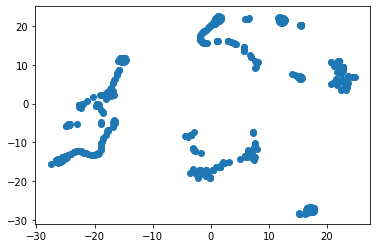

In [25]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [26]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)\
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,3638.246049
1,2,2474.937898
2,3,1489.466993
3,4,518.196215
4,5,317.832182
5,6,256.641769
6,7,217.331250
7,8,182.084966
8,9,153.467740
9,10,129.578888


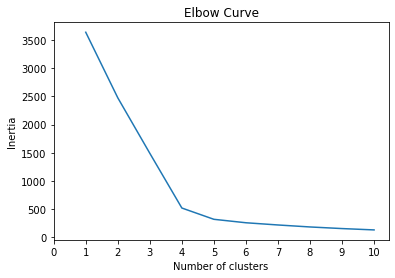

In [27]:

# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Based on the data, it appears that cryptocurrencies can be clustered together at about 4 clusters based on the elbow curve.